In [7]:
import numpy as np
from scipy.fftpack import fft,ifft
from scipy.signal import stft
import scipy
from scipy.io import wavfile
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython
import soundfile as sf

In [2]:
%matplotlib inline
# %matplotlib osx

In [11]:
fs, wav = wavfile.read('/home/yangwenhao/storage/dataset/CN-Celeb/eval/test/id00800-singing-01-001.wav')
f,t,zxx = stft(wav[:int(fs*3)], fs=fs, nperseg=0.025*fs, noverlap=0.01*fs, nfft=512, window=np.hamming(0.025*fs))
abs_zxx = np.absolute(zxx)
print(zxx.dtype)

complex64


NameError: name 'wav' is not defined

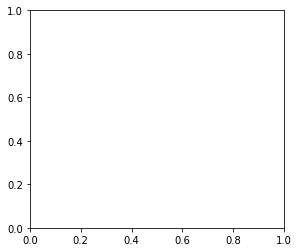

In [5]:
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
f,t,zxx = stft(wav[:int(fs*3)], fs=fs, nperseg=0.025*fs, noverlap=0.01*fs, nfft=512, window=np.hamming(0.025*fs))
abs_zxx = np.absolute(zxx)
print(zxx.dtype)

plt.pcolormesh(t, f, abs_zxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.subplot(1,2,2)
the_fs = int(fs*1.25)
f,t,zxx = stft(wav[:int(the_fs*3)], fs=the_fs, nperseg=0.025*the_fs, noverlap=0.01*the_fs, nfft=512, window=np.hamming(0.025*the_fs))
abs_zxx = np.absolute(zxx)
print(zxx.dtype)

plt.pcolormesh(t, f, abs_zxx)
# plt.imshow(abs_zxx)
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')

plt.show()

/tmp/ipykernel_124165/1691590936.py:10: FutureWarning: Pass sr=22050 as keyword args. From version 0.10 passing these as positional arguments will result in an error
  b = librosa.effects.pitch_shift(y, sr, n_steps=14)


Text(0.5, 1.0, 'Linear-frequency power spectrogram')

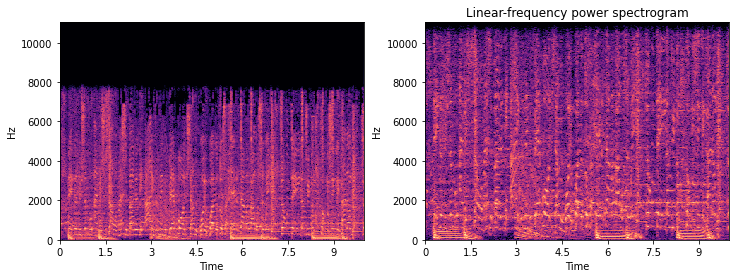

In [37]:
y, sr = librosa.load("/home/yangwenhao/storage/dataset/CN-Celeb/eval/test/id00800-singing-01-001.wav", duration=10)
fig, ax = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(12, 4))

D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[0])
plt.title('Linear-frequency power spectrogram')
# .label_outer()

b = librosa.effects.pitch_shift(y, sr, n_steps=14)
D = librosa.amplitude_to_db(np.abs(librosa.stft(b)), ref=np.max)
img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                               sr=sr, ax=ax[1])

plt.title('Linear-frequency power spectrogram')

In [28]:
IPython.display.Audio(y, rate=sr)

In [29]:
IPython.display.Audio(librosa.effects.time_stretch(y, rate=1.5), rate=sr)

/home/yangwenhao/anaconda3/envs/py38/lib/python3.8/site-packages/librosa/util/decorators.py:88: UserWarning: PySoundFile failed. Trying audioread instead.
  return f(*args, **kwargs)


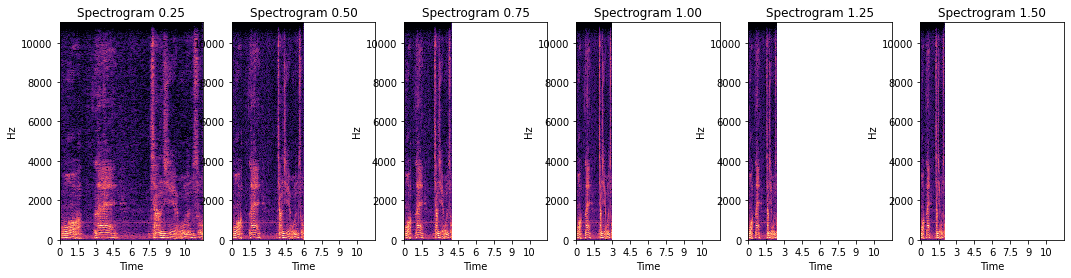

In [57]:
y, sr = librosa.load("0328.MP3", offset=3, duration=3)
sf.write('y.wav', y, sr)

durs = [0.25, 0.5, 0.75, 1.0, 1.25, 1.5]
fig, ax = plt.subplots(nrows=1, ncols=len(durs), sharex=True, figsize=(18, 4))

for i, d in enumerate(durs):
    if d != 1.0:
        b = librosa.effects.time_stretch(y, rate=d)
    else:
        b = y
        
    D = librosa.amplitude_to_db(np.abs(librosa.stft(b)), ref=np.max)
    img = librosa.display.specshow(D, y_axis='linear', x_axis='time',
                                   sr=sr, ax=ax[i])
    ax[i].set_title('Spectrogram {:.2f}'.format(d))

In [1]:
from speechbrain.pretrained import SpeakerRecognition
verification = SpeakerRecognition.from_hparams(source="speechbrain/spkrec-ecapa-voxceleb",
                                               savedir="pretrained_models/spkrec-ecapa-voxceleb")

/home/yangwenhao/anaconda3/envs/py38/lib/python3.8/site-packages/huggingface_hub/utils/_deprecation.py:39: FutureWarning: Pass library_name=False as keyword args. From version 0.8 passing these as positional arguments will result in an error
  warnings.warn(


Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/83.3M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.92k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/5.53M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/129k [00:00<?, ?B/s]

In [37]:
sf.write('y_0.5.wav', librosa.effects.time_stretch(y, rate=0.5), sr)
sf.write('y_0.25.wav', librosa.effects.time_stretch(y, rate=0.25), sr)

In [45]:
import matplotlib.pyplot as plt
import os

In [ ]:
scores_str = []
for i in range(80):
    dur = (i+1) / 40
    if not os.path.exists('./data/y_{:.4f}.wav'.format(dur)):
        sf.write('./data/y_{:.4f}.wav'.format(dur), librosa.effects.time_stretch(y, rate=dur), sr)
    
    score, prediction = verification.verify_files("./data/y_{:.4f}.wav".format(dur), "./y.wav") # Different Speakers
    scores_str.append([dur, float(score), float(prediction)])

scores_str_np = np.array(scores_str)
# plt.plot(scores_np[:, 0], scores_np[:, 2], marker='.')

In [ ]:
y_len = len(y)
scores = []
for i in range(40):
    dur = (i+1) / 40
    if not os.path.exists('./data_cut/y_{:.4f}.wav'.format(dur)):
        sf.write('./data_cut/y_{:.4f}.wav'.format(dur) , y[:int(y_len*dur)], sr)
    score, prediction = verification.verify_files("./data_cut/y_{:.4f}.wav".format(dur), "./y.wav") # Different Speakers
    scores.append([dur, float(score), float(prediction)])

scores_np = np.array(scores)

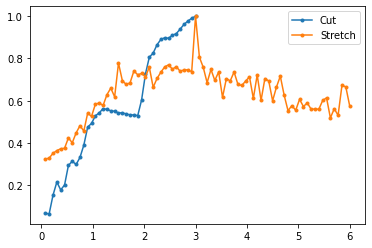

In [72]:
plt.plot(scores_np[:, 0]*3, scores_np[:, 1], marker='.')
plt.plot(scores_str_np[:, 0]*3, scores_str_np[:, 1], marker='.')

plt.legend(['Cut', 'Stretch'])

In [31]:
IPython.display.Audio(y, rate=sr)

In [32]:
IPython.display.Audio(librosa.effects.time_stretch(y, rate=0.8), rate=sr)

In [33]:
IPython.display.Audio(librosa.effects.time_stretch(y, rate=1.25), rate=sr)

In [11]:
IPython.display.Audio(librosa.effects.time_stretch(y, rate=1.5), rate=sr)

In [19]:
from speechbrain.lobes.augment import TimeDomainSpecAugment
import torch

In [26]:
t = TimeDomainSpecAugment(sample_rate=sr, speeds=[75])

y_t = t(torch.tensor(y).unsqueeze(0), torch.tensor(len(y)/sr).unsqueeze(0))

In [28]:
print(y.shape, y_t.shape)

(220500,) torch.Size([1, 165370])


In [27]:
IPython.display.Audio(y_t[0].numpy(), rate=sr)

In [17]:
fs, wav = wavfile.read('../data/Nov26_23_11.wav')

In [18]:
f,t,zxx = stft(wav[:,0], fs=fs, nperseg=0.025*fs, noverlap=0.01*fs, nfft=2048, window=np.hamming(0.025*fs))
abs_zxx = np.absolute(zxx)
# print(zxx.dtype)

complex128


In [19]:
print(wav.shape)
print(f.shape)
print(t.shape)
print(zxx.shape)

(309120, 2)
(1025,)
(431,)
(1025, 431)


/home/yangwenhao/local/project/SpeakerVerification-pytorch/Misc/audio_processing/ipykernel_1775535/820454445.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(t, f[:240], abs_zxx[:240, :])


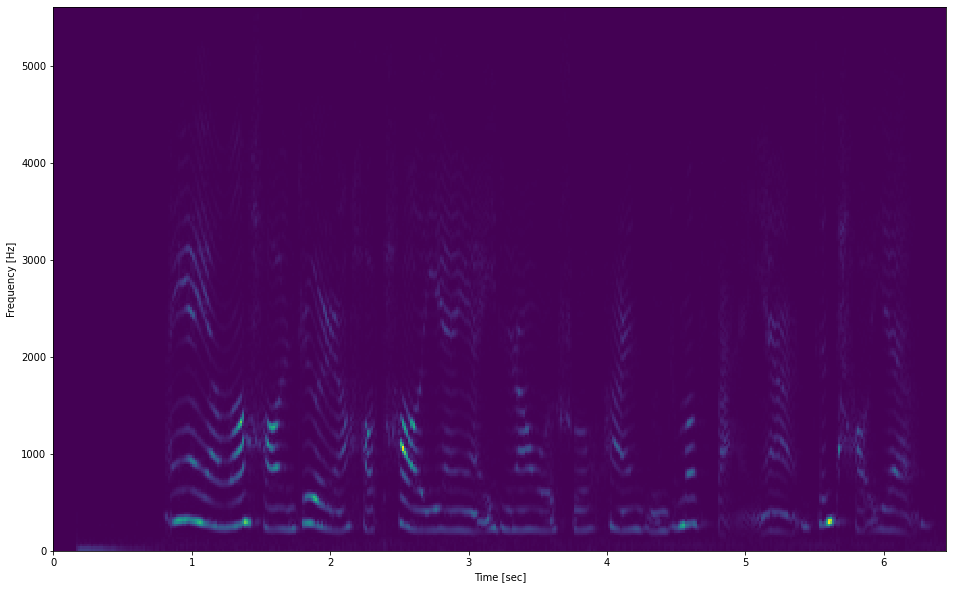

In [22]:
plt.figure(figsize=(16,10))
plt.pcolormesh(t, f[:240], abs_zxx[:240, :])
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [16]:
f, t, Sxx = scipy.signal.spectrogram(wav, fs=1.0, window=('tukey', 0.25), nperseg=None, noverlap=None, nfft=None, detrend='constant', return_onesided=True, scaling='density', axis=- 1, mode='psd')

ValueError: too many values to unpack (expected 2)

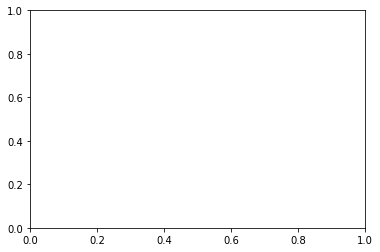

In [17]:
# f, t, Sxx = signal.spectrogram(x, fs)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.show()

In [ ]:
wav.shape